In [1]:
# EDA in Notebook

In [36]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

PROCESSED_DIR = "data/processed"
REPORT_FIGS   = "reports/figures"
REPORT_TBLS   = "reports/tables"
os.makedirs(PROCESSED_DIR, exist_ok=True)
os.makedirs(REPORT_FIGS, exist_ok=True)
os.makedirs(REPORT_TBLS, exist_ok=True)

# Set working directory 

os.chdir("C:\\Users\\yonas\\Documents\\ICPAC\\ea_seasonal_pred\\seasonal-ml-pred")


In [37]:
#  Import Uganda Data 

data_uganda_ond = pd.read_csv("data/processed/uganda_OND_target_features_1981_2024.csv", parse_dates=["season_year"])
data_uganda_ond.set_index("season_year", inplace=True)


data_uganda_ond.head()


,OND_total_mm,OND_clim1991_2020_mm,OND_anom_mm,OND_anom_std,n12_JAS,n12_AS,n12_Sep,n3_JAS,n3_AS,n3_Sep,...,pacwarmpool_Sep,censo_JAS,censo_AS,censo_Sep,dmi_JAS,dmi_AS,dmi_Sep,PERSIST_MJJ_anom_mm,PERSIST_JJA_anom_mm,PERSIST_JAS_anom_mm
season_year,,,,,,,,,,,,,,,,,,,,,
1981-01-01,251.31606,328.4043,-77.088240,-1.053309,-0.936667,-0.960,-0.79,-0.520000,-0.480,-0.23,...,-0.186,-0.360000,-0.235,-0.18,-0.648333,-0.6925,-0.757,-2.042121,1.513391,3.086952
1982-01-01,373.33360,328.4043,44.929290,0.613899,0.860000,1.055,1.31,1.083333,1.420,1.89,...,-0.495,1.786667,1.905,1.95,0.321000,0.3490,0.442,-8.787225,-1.924204,-5.021202
1983-01-01,269.18472,328.4043,-59.219574,-0.809157,2.700000,2.150,1.37,0.526667,0.390,0.13,...,-0.082,-0.070000,-0.285,-0.64,0.267000,0.1380,-0.069,-0.441927,2.636551,2.906827
1984-01-01,294.98053,328.4043,-33.423767,-0.456691,-0.420000,-0.315,-0.07,-0.510000,-0.375,-0.34,...,-0.288,-0.250000,-0.265,-0.21,-0.490667,-0.5530,-0.608,-10.111957,-6.647986,-6.963177
1985-01-01,262.54230,328.4043,-65.862000,-0.899917,-1.206667,-1.110,-0.99,-0.946667,-0.870,-0.86,...,-0.381,-0.390000,-0.460,-0.28,-0.366667,-0.3485,-0.238,-4.830346,0.538307,1.014789


In [38]:
def ensure_year_index(df: pd.DataFrame, name="season_year") -> pd.DataFrame:
    df = df.copy()
    if isinstance(df.index, pd.DatetimeIndex):
        df.index = df.index.year
    else:
        try:
            df.index = df.index.astype(int)
        except Exception:
            df.index = pd.to_datetime(df.index, errors="coerce").year
    df.index = pd.Index(df.index, name=name)
    return df


In [45]:
data_uganda_ond = ensure_year_index(data_uganda_ond)
data_uganda_ond.head()

,OND_total_mm,OND_clim1991_2020_mm,OND_anom_mm,OND_anom_std,n12_JAS,n12_AS,n12_Sep,n3_JAS,n3_AS,n3_Sep,...,pacwarmpool_Sep,censo_JAS,censo_AS,censo_Sep,dmi_JAS,dmi_AS,dmi_Sep,PERSIST_MJJ_anom_mm,PERSIST_JJA_anom_mm,PERSIST_JAS_anom_mm
season_year,,,,,,,,,,,,,,,,,,,,,
1981,251.31606,328.4043,-77.088240,-1.053309,-0.936667,-0.960,-0.79,-0.520000,-0.480,-0.23,...,-0.186,-0.360000,-0.235,-0.18,-0.648333,-0.6925,-0.757,-2.042121,1.513391,3.086952
1982,373.33360,328.4043,44.929290,0.613899,0.860000,1.055,1.31,1.083333,1.420,1.89,...,-0.495,1.786667,1.905,1.95,0.321000,0.3490,0.442,-8.787225,-1.924204,-5.021202
1983,269.18472,328.4043,-59.219574,-0.809157,2.700000,2.150,1.37,0.526667,0.390,0.13,...,-0.082,-0.070000,-0.285,-0.64,0.267000,0.1380,-0.069,-0.441927,2.636551,2.906827
1984,294.98053,328.4043,-33.423767,-0.456691,-0.420000,-0.315,-0.07,-0.510000,-0.375,-0.34,...,-0.288,-0.250000,-0.265,-0.21,-0.490667,-0.5530,-0.608,-10.111957,-6.647986,-6.963177
1985,262.54230,328.4043,-65.862000,-0.899917,-1.206667,-1.110,-0.99,-0.946667,-0.870,-0.86,...,-0.381,-0.390000,-0.460,-0.28,-0.366667,-0.3485,-0.238,-4.830346,0.538307,1.014789


In [40]:
def year_array(idx) -> np.ndarray:
    """Return an array of year ints from either DatetimeIndex or int-like index."""
    if isinstance(idx, pd.DatetimeIndex):
        return idx.year.to_numpy(dtype=int)
    # try casting to int directly
    try:
        return pd.Index(idx).astype(int).to_numpy()
    except Exception:
        # last resort: parse as datetime and take year
        return pd.to_datetime(idx, errors="coerce").year.to_numpy(dtype=int)

In [43]:
REPORT_FIGS = "reports/figures"
REPORT_TBLS = "reports/tables"
os.makedirs(REPORT_FIGS, exist_ok=True)
os.makedirs(REPORT_TBLS, exist_ok=True)

def summarize_target(table, season: str, anomaly_col: str, total_col: str, clim_col: str):
    y = table[anomaly_col].copy()
    tot = table[total_col].copy()
    clim = table[clim_col].copy()

    # --- Summary stats
    desc = y.describe(percentiles=[.05,.10,.25,.50,.75,.90,.95]).to_frame("value")
    desc.to_csv(os.path.join(REPORT_TBLS, f"{season}_target_anomaly_summary.csv"))
    print(f"=== {season} target summary (anomaly mm) ===")
    display(desc)

    # --- Time series
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(y.index, y.values, label="Anomaly (mm)")
    ax.axhline(0, linestyle="--", linewidth=1)
    ax.set_title(f"{season}: Seasonal rainfall anomaly")
    ax.set_xlabel("Year"); ax.set_ylabel("mm"); ax.legend()
    fig.tight_layout(); fig.savefig(os.path.join(REPORT_FIGS, f"{season}_anomaly_ts.png"), dpi=150)
    plt.show()

    # --- Totals vs climatology
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tot.index, tot.values, label="Total (mm)")
    ax.plot(clim.index, clim.values, label="Climatology 1991–2020 (mm)")
    ax.set_title(f"{season}: Totals vs climatology")
    ax.set_xlabel("Year"); ax.set_ylabel("mm"); ax.legend()
    fig.tight_layout(); fig.savefig(os.path.join(REPORT_FIGS, f"{season}_totals_vs_clim.png"), dpi=150)
    plt.show()

    # --- Decadal boxplot (robust to datetime index)
    df = y.dropna().to_frame("anom")
    yrs = year_array(df.index)                    # <-- convert index to years here
    df["decade"] = (yrs // 10) * 10
    decades = np.unique(df["decade"].astype(int))
    data = [df.loc[df["decade"] == d, "anom"].values for d in decades]

    fig, ax = plt.subplots(figsize=(8,4))
    ax.boxplot(data, tick_labels=[str(int(d)) for d in decades], showmeans=True)
    ax.set_title(f"{season}: Anomaly by decade") 
    ax.set_xlabel("Decade") 
    ax.set_ylabel("mm")
    fig.tight_layout() 
    fig.savefig(os.path.join(REPORT_FIGS, f"{season}_anomaly_by_decade.png"), dpi=150)
    plt.show()

    # --- Linear trend (robust)
    y_no_na = y.dropna()
    yr_num = year_array(y_no_na.index).astype(float)
    yy = y_no_na.values
    if len(yy) > 3:
        slope, intercept, r, p, se = linregress(yr_num, yy)
        print(f"Trend {season}: slope={slope:.2f} mm/yr (p={p:.3f}, r={r:.2f})")
    else:
        print("Not enough data for trend.")


=== OND target summary (anomaly mm) ===


,value
count,44.000000
mean,-4.571462
std,66.803853
min,-121.979034
5%,-87.610841
10%,-73.110354
25%,-49.469459
50%,-17.898682
75%,33.797585
90%,82.521012


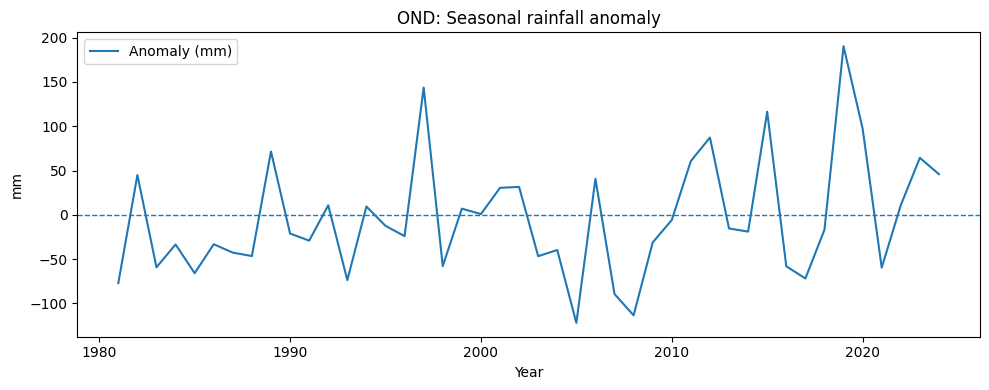

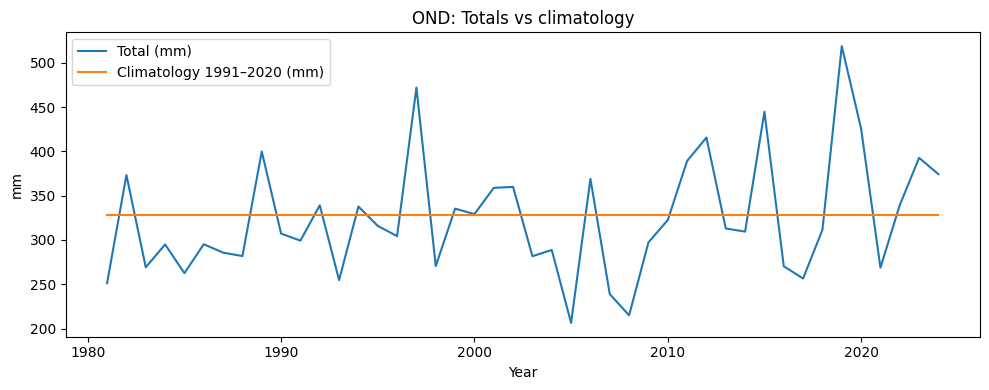

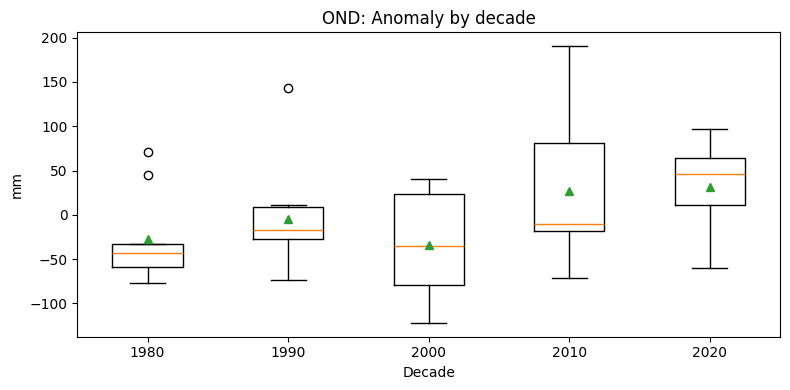

Trend OND: slope=1.46 mm/yr (p=0.064, r=0.28)


In [48]:
# Example with your Uganda OND table (must include these columns)
# data_uganda_ond.index can be datetime or ints; both are fine now.
summarize_target(
    data_uganda_ond,
    season="OND",
    anomaly_col="OND_anom_mm",
    total_col="OND_total_mm",
    clim_col="OND_clim1991_2020_mm",
)


In [49]:
from scipy.stats import pearsonr, spearmanr


In [50]:
def corr_with_targets(df: pd.DataFrame, target_cols: list[str], feature_cols: list[str], method: str = "pearson"):
    """
    Pairwise correlations between each feature and each target.
    Returns (R, P, N) as DataFrames (rows=features, cols=targets).
    """
    R = pd.DataFrame(index=feature_cols, columns=target_cols, dtype=float)
    P = pd.DataFrame(index=feature_cols, columns=target_cols, dtype=float)
    N = pd.DataFrame(index=feature_cols, columns=target_cols, dtype=int)

    stat = pearsonr if method.lower().startswith("pear") else spearmanr

    for t in target_cols:
        for f in feature_cols:
            sub = df[[t, f]].dropna()
            n = len(sub)
            N.loc[f, t] = n
            if n >= 3:
                r, p = stat(sub[t].values, sub[f].values)
                R.loc[f, t] = r
                P.loc[f, t] = p
            else:
                R.loc[f, t] = np.nan
                P.loc[f, t] = np.nan
    return R, P, N

def heatmap_feature_vs_target(R: pd.DataFrame, P: pd.DataFrame, title: str, outfile_png: str, topn: int = 40, sort_by: str | None = None, target_for_sort: str | None = None, annotate: bool = True):
    """
    Plot heatmap of correlations: rows=features, cols=targets.
    sort_by: "abs" or "value" to sort rows by correlation with target_for_sort.
    """
    rmat = R.copy()

    # sort features (rows)
    if sort_by is not None and target_for_sort in rmat.columns:
        key = rmat[target_for_sort].abs() if sort_by == "abs" else rmat[target_for_sort]
        order = key.sort_values(ascending=False).index.tolist()
        rmat = rmat.loc[order]

    # limit to topn rows for readability
    if topn is not None and rmat.shape[0] > topn:
        rmat = rmat.iloc[:topn, :]

    # plot
    nrows, ncols = rmat.shape
    fig_h = max(4, 0.35 * nrows + 1)   # dynamic height
    fig_w = max(4, 1.2 * ncols + 2)
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))
    im = ax.imshow(rmat.values, vmin=-1, vmax=1)  # default colormap
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Correlation (r)")

    ax.set_yticks(range(nrows)); ax.set_yticklabels(rmat.index, fontsize=8)
    ax.set_xticks(range(ncols)); ax.set_xticklabels(rmat.columns, rotation=0, fontsize=9)
    ax.set_title(title)
    ax.set_xlabel("Target"); ax.set_ylabel("Feature")

    # optional text annotations with r and significance stars
    if annotate:
        # significance: * (p<=0.05), ** (p<=0.01), *** (p<=0.001)
        for i in range(nrows):
            for j in range(ncols):
                r = rmat.iat[i, j]
                p = P.loc[rmat.index[i], rmat.columns[j]]
                if np.isfinite(r):
                    stars = "***" if p is not None and p <= 0.001 else ("**" if p is not None and p <= 0.01 else ("*" if p is not None and p <= 0.05 else ""))
                    ax.text(j, i, f"{r: .2f}{stars}", ha="center", va="center", fontsize=7, color="white" if abs(r) > 0.5 else "black")

    fig.tight_layout()
    fig.savefig(outfile_png, dpi=150)
    plt.show()

In [53]:
def heatmap_feature_vs_target(
    R: pd.DataFrame,
    P: pd.DataFrame,
    title: str,
    outfile_png: str,
    topn: int = 40,
    sort_by: str | None = None,
    target_for_sort: str | None = None,
    annotate: bool = True,
    figsize: tuple[float, float] | None = None,
    ytick_fontsize: int = 10,
    xtick_fontsize: int = 11,
    left_margin: float = 0.35,  # more space for long feature names
):
    """
    Plot heatmap of correlations: rows=features, cols=targets.
    figsize: (width, height) inches. If None, a sensible wide default is used.
    """
    rmat = R.copy()

    # sort rows by correlation with the chosen target
    if sort_by is not None and target_for_sort in rmat.columns:
        key = rmat[target_for_sort].abs() if sort_by == "abs" else rmat[target_for_sort]
        rmat = rmat.loc[key.sort_values(ascending=False).index]

    # limit to topn rows
    if topn is not None and rmat.shape[0] > topn:
        rmat = rmat.iloc[:topn, :]

    nrows, ncols = rmat.shape

    # --- wide default if not provided
    if figsize is None:
        fig_h = max(5, 0.32 * nrows + 2.0)
        fig_w = max(12, 3.0 * ncols + 8.0)   # force a wide figure even with 1 target col
        figsize = (fig_w, fig_h)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(rmat.values, vmin=-1, vmax=1)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Correlation (r)")

    ax.set_yticks(range(nrows)); ax.set_yticklabels(rmat.index, fontsize=ytick_fontsize)
    ax.set_xticks(range(ncols)); ax.set_xticklabels(rmat.columns, fontsize=xtick_fontsize)
    ax.set_title(title); ax.set_xlabel("Target"); ax.set_ylabel("Feature")

    # annotate with r and significance stars
    if annotate:
        for i in range(nrows):
            for j in range(ncols):
                r = rmat.iat[i, j]
                p = P.loc[rmat.index[i], rmat.columns[j]]
                if np.isfinite(r):
                    stars = "***" if p is not None and p <= 0.001 else ("**" if p is not None and p <= 0.01 else ("*" if p is not None and p <= 0.05 else ""))
                    ax.text(j, i, f"{r: .2f}{stars}", ha="center", va="center",
                            fontsize=8, color="white" if abs(r) > 0.5 else "black")

    # give labels breathing room on the left
    fig.subplots_adjust(left=left_margin, right=0.98, top=0.92, bottom=0.08)
    fig.savefig(outfile_png, dpi=150)
    plt.show()


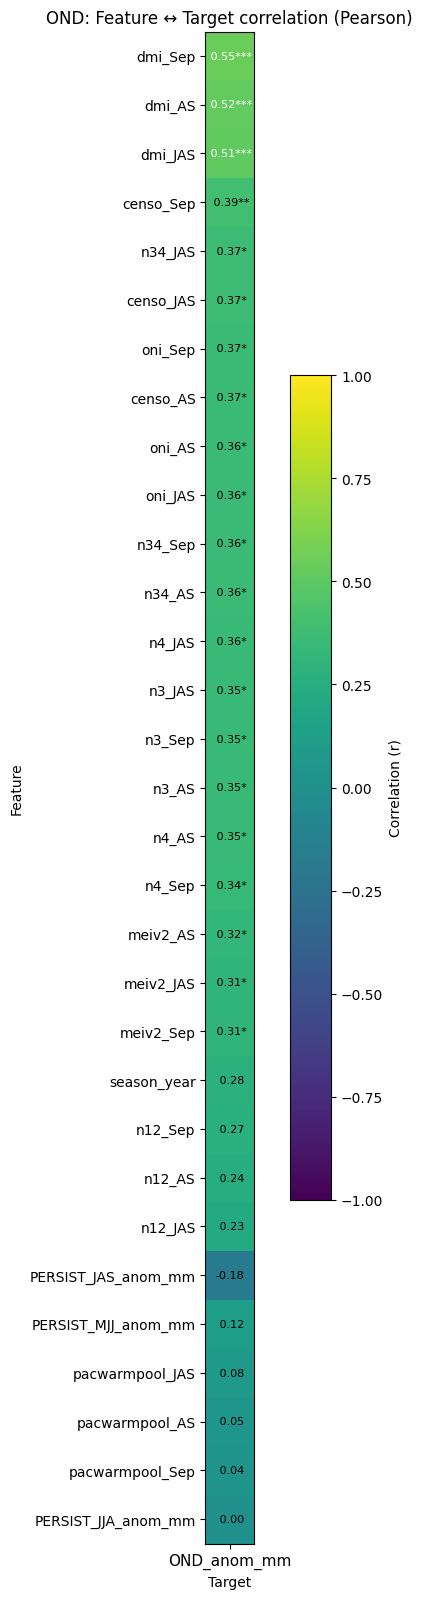

In [55]:
heatmap_feature_vs_target(
    R_ond, P_ond,
    title="OND: Feature ↔ Target correlation (Pearson)",
    outfile_png=os.path.join(REPORT_FIGS, "OND_feature_target_heatmap_wide.png"),
    topn=40,
    sort_by="abs",
    target_for_sort="OND_anom_mm",
    annotate=True,
    figsize=(16, 18),         # ← make it wider and taller
    ytick_fontsize=10,
    left_margin=0.42          # ← more space for long feature names
)


In [ ]:
heatmap_feature_vs_target(
    R_mam, P_mam,
    title="MAM: Feature ↔ Target correlation (Pearson)",
    outfile_png=os.path.join(REPORT_FIGS, "MAM_feature_target_heatmap_wide.png"),
    topn=40,
    sort_by="abs",
    target_for_sort="MAM_anom_mm",
    annotate=True,
    figsize=(14, 18),
    ytick_fontsize=10,
    left_margin=0.42
)


In [57]:
def load_model_table(parq: str, csv: str):
    p = os.path.join(PROCESSED_DIR, parq)
    c = os.path.join(PROCESSED_DIR, csv)
    if os.path.exists(p):
        df = pd.read_parquet(p)
    elif os.path.exists(c):
        df = pd.read_csv(c, index_col=0)
    else:
        raise FileNotFoundError(f"Missing {p} or {c}")
    # Ensure year index (int)
    if isinstance(df.index, pd.DatetimeIndex):
        df.index = df.index.year
    else:
        try:
            df.index = df.index.astype(int)
        except Exception:
            df.index = pd.to_datetime(df.index, errors="coerce").year.astype(int)
    df.index.name = "season_year"
    return df.sort_index()



OND_targets = ["OND_anom_mm", "OND_total_mm", "OND_anom_std"]
MAM_targets = ["MAM_anom_mm", "MAM_total_mm", "MAM_anom_std"]

OND_features = [c for c in data_uganda_ond.columns if c not in ["OND_total_mm","OND_clim1991_2020_mm","OND_anom_mm","OND_anom_std"]]
#MAM_features = [c for c in data_uganda_mam.columns if c not in ["MAM_total_mm","MAM_clim1991_2020_mm","MAM_anom_mm","MAM_anom_std"]]

def zscore(s: pd.Series) -> pd.Series:
    m, sd = s.mean(), s.std(ddof=1)
    return (s - m) / sd if sd and not np.isclose(sd, 0.0) else s * np.nan

def rolling_if(s: pd.Series, win: int) -> pd.Series:
    return s if win in (0, 1) else s.rolling(win, min_periods=max(2, win//2)).mean()


In [59]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [60]:
season_dd = widgets.Dropdown(options=["OND","MAM"], value="OND", description="Season:")
scale_dd  = widgets.Dropdown(options=["z-score overlay","raw (twin axis)"], value="z-score overlay", description="Scaling:")
smooth_sl = widgets.IntSlider(value=0, min=0, max=7, step=1, description="Roll mean (yrs):", continuous_update=False)

# These will be (re)built when season changes
target_dd = widgets.Dropdown(description="Target:")
feat_ms   = widgets.SelectMultiple(description="Features:", rows=12, layout=widgets.Layout(width="550px"))

year_range = widgets.IntRangeSlider(description="Year range:", min=1980, max=2025, step=1, value=(1981, 2024),
                                    continuous_update=False, layout=widgets.Layout(width="550px"))

out = widgets.Output()


In [ ]:
def setup_for_season(season: str):
    if season == "OND":
        df = OND; t_opts = OND_targets; f_opts = OND_features
    else:
        df = MAM; t_opts = MAM_targets; f_opts = MAM_features

    target_dd.options = [c for c in t_opts if c in df.columns]
    target_dd.value   = target_dd.options[0]

    # Suggest a few default features if present
    defaults = {
        "OND": ["N34_JAS","DMI_JAS","PERSIST_JAS_anom_mm"],
        "MAM": ["N34_NDJ","DMI_NDJ","PERSIST_DJF_anom_mm"]
    }
    feat_opts = [c for c in f_opts if c in df.columns]
    feat_ms.options = feat_opts
    feat_ms.value   = tuple([c for c in defaults[season] if c in feat_opts])

    # Year slider bounds
    year_min, year_max = int(df.index.min()), int(df.index.max())
    year_range.min, year_range.max = year_min, year_max
    year_range.value = (max(1981, year_min), year_max)

setup_for_season(season_dd.value)

def on_season_change(change):
    if change["name"] == "value":
        setup_for_season(change["new"])
season_dd.observe(on_season_change)

def plot_interactive(*args):
    out.clear_output()
    with out:
        season = season_dd.value
        df = OND if season == "OND" else MAM
        ycol = target_dd.value
        fcols = list(feat_ms.value)

        if not fcols:
            print("Select at least one feature.")
            return

        y0, y1 = year_range.value
        df = df.loc[(df.index >= y0) & (df.index <= y1)].copy()

        # Build series (align and drop NaNs per pair)
        y = df[ycol].astype(float)
        features = {c: df[c].astype(float) for c in fcols}

        # Optional smoothing
        win = int(smooth_sl.value)
        y = rolling_if(y, win)
        features = {k: rolling_if(v, win) for k, v in features.items()}

        # Plot
        fig, ax = plt.subplots(figsize=(12, 5))
        ax.set_title(f"{season}: {ycol} with selected features")

        if scale_dd.value == "z-score overlay":
            y_plot = zscore(y)
            ax.plot(y_plot.index, y_plot.values, linewidth=2.2, label=ycol)
            for k, s in features.items():
                ax.plot(s.index, zscore(s).values, label=k, alpha=0.9)
            ax.set_ylabel("z-score")
        else:
            # raw target on left, features on right (twin)
            ax.plot(y.index, y.values, linewidth=2.2, label=ycol, color="k")
            ax.set_ylabel(ycol)
            ax2 = ax.twinx()
            for k, s in features.items():
                ax2.plot(s.index, s.values, label=k, alpha=0.9)
            ax2.set_ylabel("features (raw units)")
            # merge legends
            lines1, labels1 = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax2.legend(lines1+lines2, labels1+labels2, loc="upper left")
        if scale_dd.value == "z-score overlay":
            ax.legend(loc="upper left")
        ax.set_xlabel("Year")
        ax.grid(True, alpha=0.3)
        plt.show()

        # Correlation table (pairwise complete)
        rows = []
        for k, s in features.items():
            sub = pd.concat([y, s], axis=1).dropna()
            if len(sub) >= 3:
                r = sub.iloc[:,0].corr(sub.iloc[:,1])
                rows.append({"feature": k, "r_with_target": r, "N": len(sub)})
            else:
                rows.append({"feature": k, "r_with_target": np.nan, "N": len(sub)})
        corr_df = pd.DataFrame(rows).sort_values("r_with_target", key=np.abs, ascending=False)
        display(corr_df.reset_index(drop=True))


In [ ]:
ui = widgets.VBox([
    widgets.HBox([season_dd, scale_dd, smooth_sl]),
    widgets.HBox([target_dd]),
    widgets.HBox([feat_ms]),
    widgets.HBox([year_range]),
])

for w in [season_dd, scale_dd, smooth_sl, target_dd, feat_ms, year_range]:
    w.observe(lambda change: plot_interactive(), names="value")

display(ui, out)
plot_interactive()  # initial draw